In [13]:
using Gen
using Random
using Distributions
using StatsBase: mean, std, quantile
using BenchmarkTools
using FilePathsBase;
using LinearAlgebra: dot, Diagonal
using JSON
import PyPlot
plt = PyPlot.plt
using JLD

display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

In [14]:
include("utils.jl")
include("environment.jl")
include("raycaster.jl")
include("plotting.jl")
include("code_from_part_1.jl");

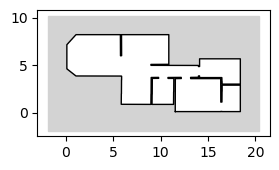

In [15]:
env = load_env(2010);
plt.figure(figsize=(3,3)); plt.gca().set_aspect(1.);
draw_env!(env);

In [32]:
is_inside(p::Pose, env::Env) = is_inside(p.x, env.segs)

function random_pose_inside(env)
    while true
        p = pose_prior(env)
        if is_inside(p, env)
            return p
        end
    end
end

random_pose_inside (generic function with 1 method)

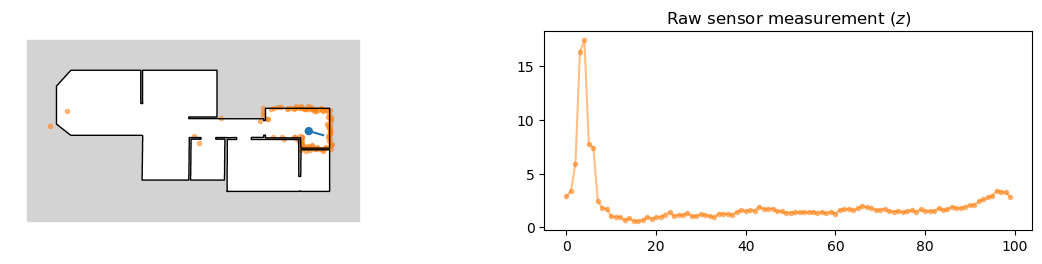

In [33]:
# Config
# ---
sensor_args  = (num_rays=100, fov=180, angular_noise=0.01, depth_noise=0.01, max_depth=40.)


# Initial state of the chain
# ---
p = random_pose_inside(env)
z,a = sensor_model(p, env, sensor_args...)


############
############
fig, axs = plt.subplots(1,2,figsize=(12,3), gridspec_kw=Dict("width_ratios" => [5,4])); 
axs[1].set_aspect(1.);
axs[1].axis("off")
draw_env!(env; ax=axs[1]);
draw_pose!(p...; ax=axs[1]);
draw_sense!(p..., z, sensor_args; ax=axs[1]);
axs[2].set_title("Raw sensor measurement (\$z\$)")
axs[2].plot(z, marker=".", c="C1", alpha=0.5);
plt.tight_layout(2.);

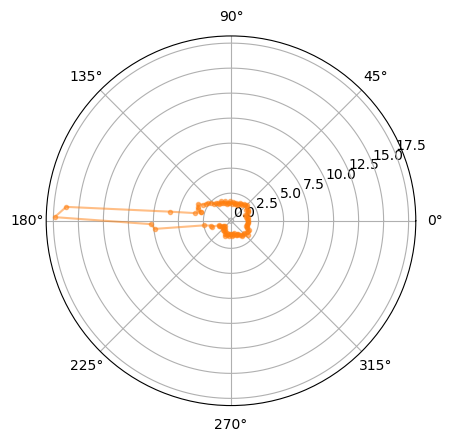

100×2 Array{Float64,2}:
  -2.78252    0.783338
  -3.29918    0.706481
  -5.87757    0.873198
 -16.2188     1.3659  
 -17.3744     0.357142
  -7.71308   -0.3312  
  -7.38309   -0.788391
  -2.41022   -0.41335 
  -1.77669   -0.422214
  -1.63665   -0.500505
  -0.968254  -0.364726
  -0.915775  -0.413045
  -0.851912  -0.451318
   ⋮                  
  -1.00942    1.48103 
  -1.188      1.52533 
  -1.37174    1.54776 
  -1.49011    1.48046 
  -1.84663    1.61533 
  -2.06785    1.58908 
  -2.31522    1.55605 
  -2.53173    1.47756 
  -3.06916    1.53907 
  -3.04448    1.29204 
  -3.0911     1.08609 
  -2.76677    0.778904

In [43]:
hits(z,a) = z .* hcat(cos.(a), sin.(a))
plt.polar(a,z, marker=".", c="C1", alpha=0.5)

hits(z,a)